In [14]:
RESULTS_FOLDER_PIX2CODE_HTML_LI = "../../results/pix2code/pix2code_web_with_html_loremipsum/"
RESULTS_FOLDER_SYNTH_BOOTSTRAP = "../../results/synthBootstrap/synthBootstrap/"
RESULTS_FOLDER_SKETCH_SYNTH_BOOTSTRAP = "../../results/sketchSynthBootstrap/sketchSynthBootstrap/"

In [15]:
import pandas as pd
import os
import json

In [17]:
def get_df(folder):
    # Load all json files into a list of dataframes
    all_json_files = [folder + "/" + file for file in os.listdir(folder) if file.endswith(".json")]

    dataframes = []

    for file_path in all_json_files:
        with open(file_path, 'r') as f:
            data = json.load(f)
        dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

    # Combine all dataframes into one
    df = pd.concat(dataframes, ignore_index=True)

    df.rename(columns={
    #'len_pren': 'prediction_length',
    
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    's_bleu': 'structural_BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
    'ted': 'HTML_tree_edit_distance',
    'n_ted': 'normalized_HTML_tree_edit_distance',
    'ssim_index': 'similarity_index'
    }, inplace=True)

    return df

In [45]:
df1 = get_df(RESULTS_FOLDER_PIX2CODE_HTML_LI)
df2 = get_df(RESULTS_FOLDER_SYNTH_BOOTSTRAP)
df3 = get_df(RESULTS_FOLDER_SKETCH_SYNTH_BOOTSTRAP)
df1['experiment'] = 'Pix2Code_HTML_LI'
df2['experiment'] = 'SynthBootstrap'
df3['experiment'] = 'Sketch_SynthBootstrap'

#combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_df = pd.concat([df2, df3], ignore_index=True)

In [46]:
combined_df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance,structural_BLEU_score,HTML_tree_edit_distance,normalized_HTML_tree_edit_distance,similarity_index
count,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000
mean,5692.805963,5879.609399,6009.096008,0.877796,791.555331,0.140946,0.937094,5.268317,0.060107,0.796726
std,2135.765343,2152.870125,2325.457704,0.111444,954.552960,0.116656,0.063913,9.537074,0.085602,0.104281
min,1616.000000,1771.000000,1787.000000,0.332843,23.000000,0.004709,0.516412,0.000000,0.000000,0.292575
25%,4155.000000,4245.000000,4303.500000,0.830802,164.500000,0.041022,0.929879,0.000000,0.000000,0.735957
50%,5352.000000,5550.000000,5589.000000,0.912846,473.000000,0.115176,0.958389,2.000000,0.025000,0.803927
75%,6833.000000,7152.500000,7212.000000,0.962427,1025.500000,0.201806,0.974896,7.000000,0.086373,0.865214
max,16036.000000,14089.000000,16036.000000,0.993028,6099.000000,0.612100,0.999528,97.000000,0.591549,1.000000


In [47]:
metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "structural_BLEU_score", "edit_distance", "normalized_edit_distance", "HTML_tree_edit_distance", "normalized_HTML_tree_edit_distance" , "similarity_index"]

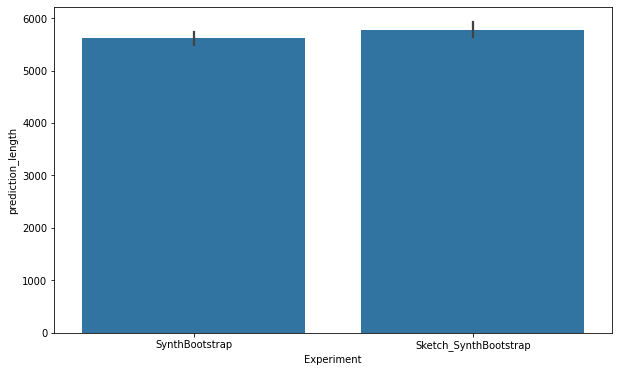

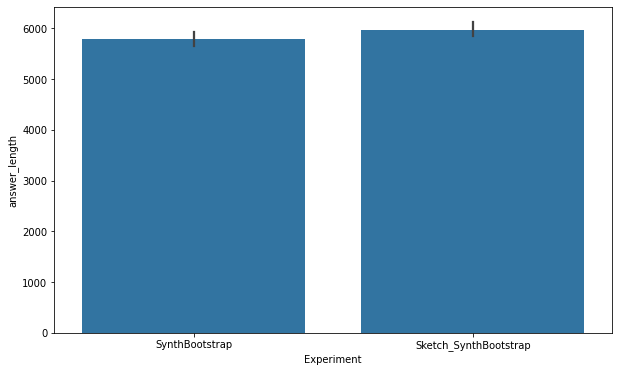

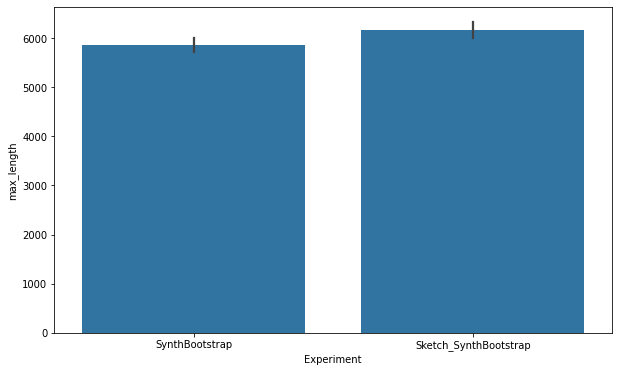

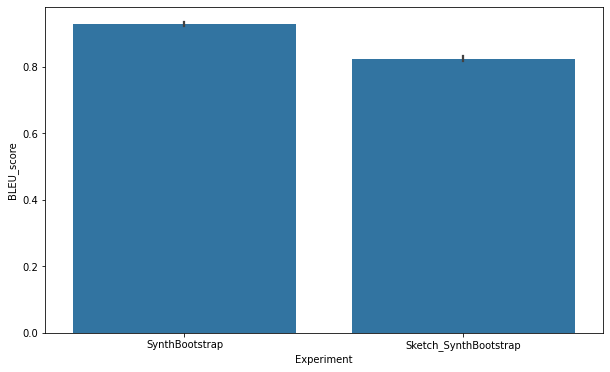

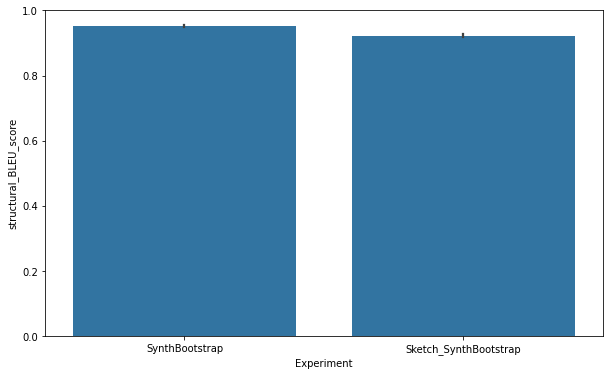

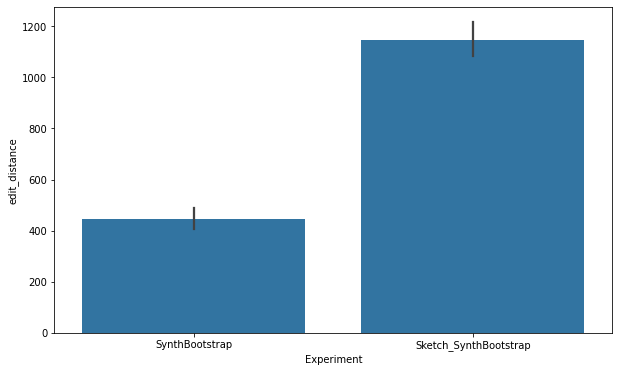

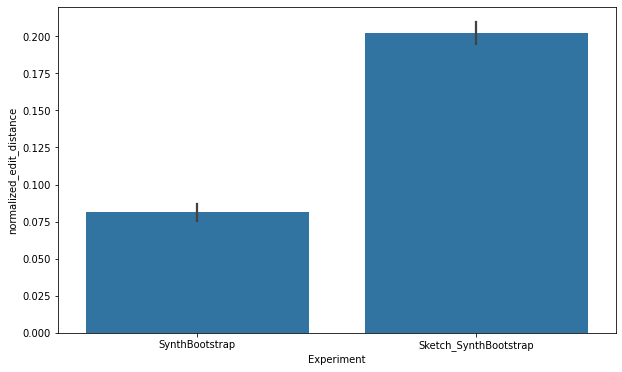

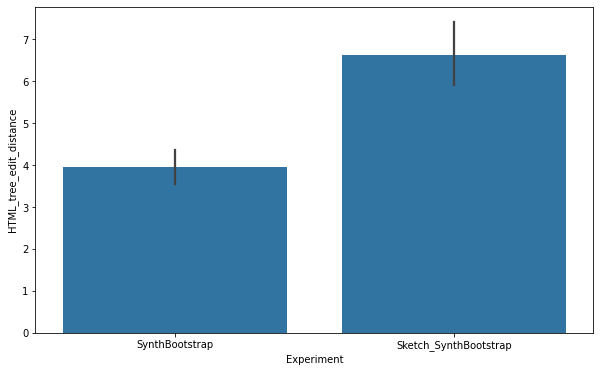

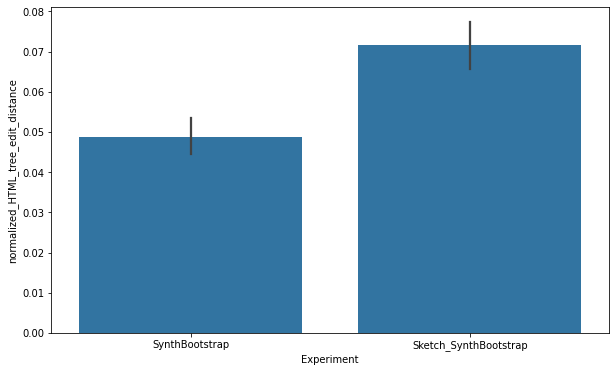

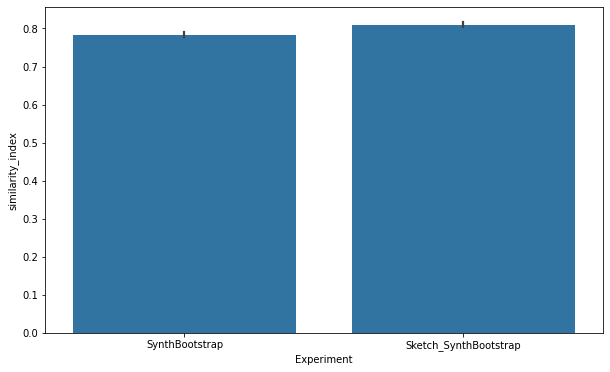

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(x='experiment', y=metric, data=combined_df)
    #plt.title(f'Average {metric} Across Experiments')
    plt.ylabel(metric)
    plt.xlabel('Experiment')
    plt.show()

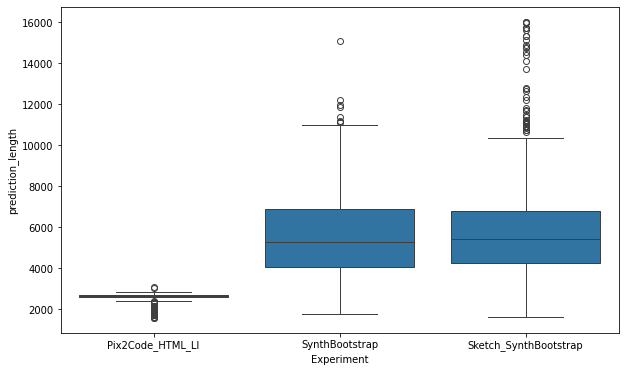

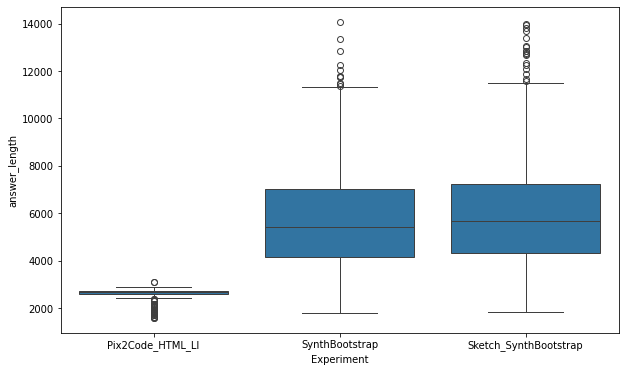

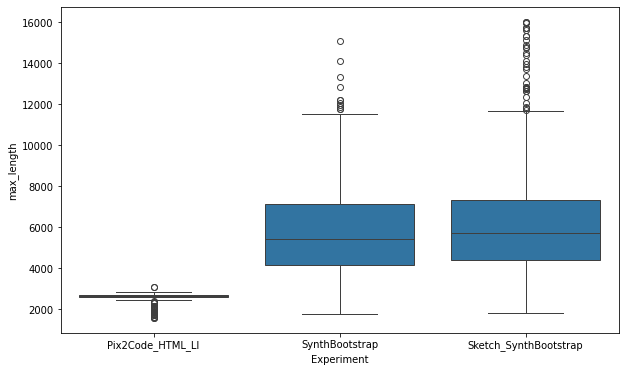

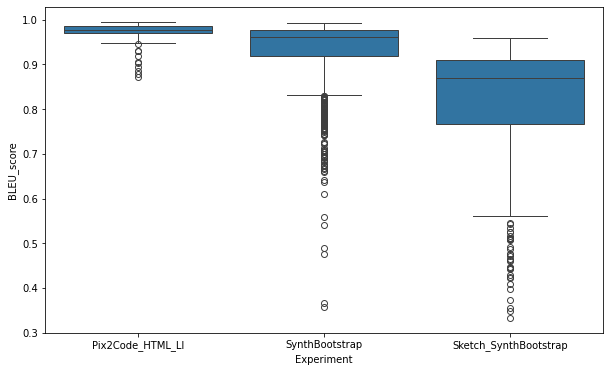

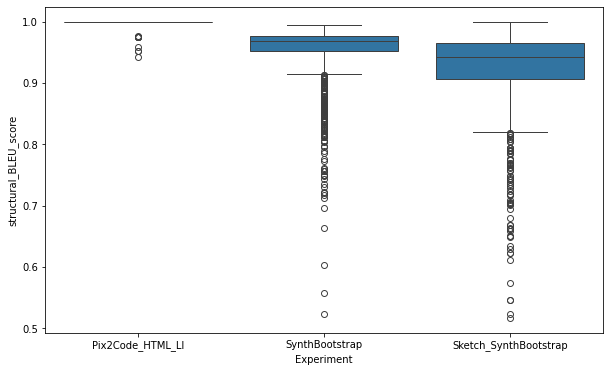

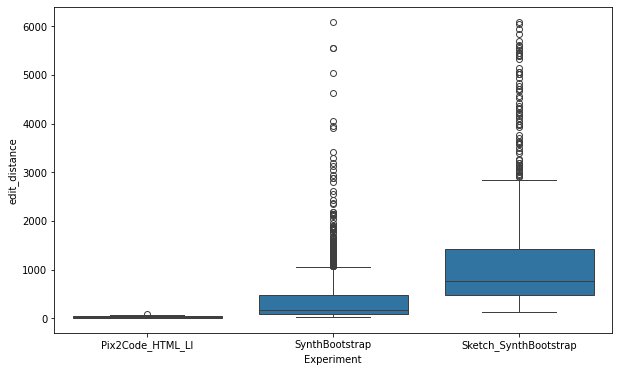

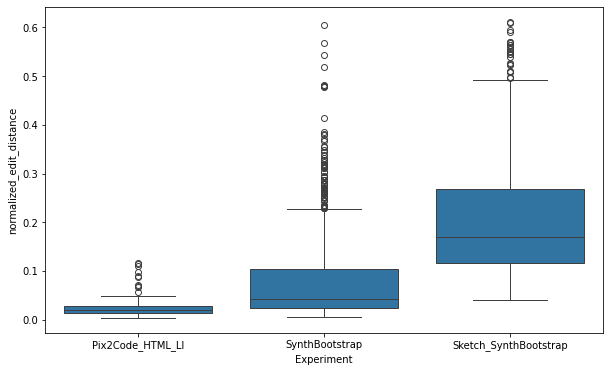

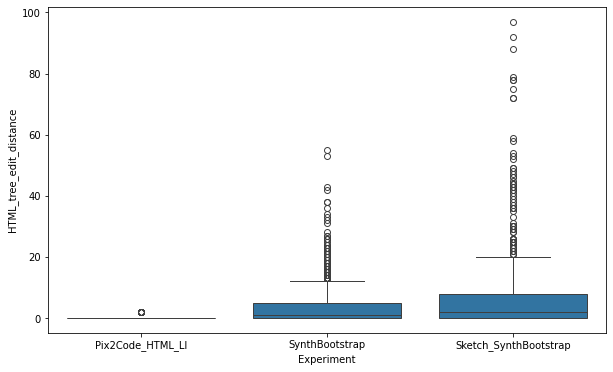

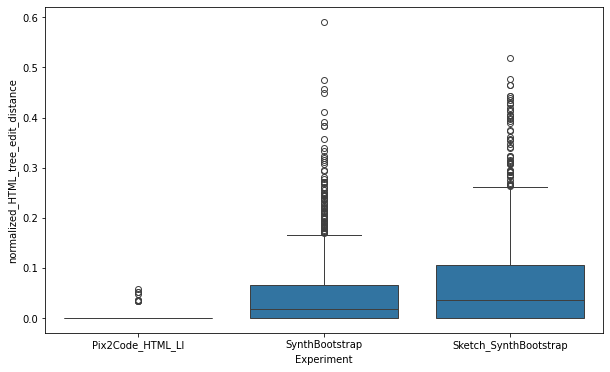

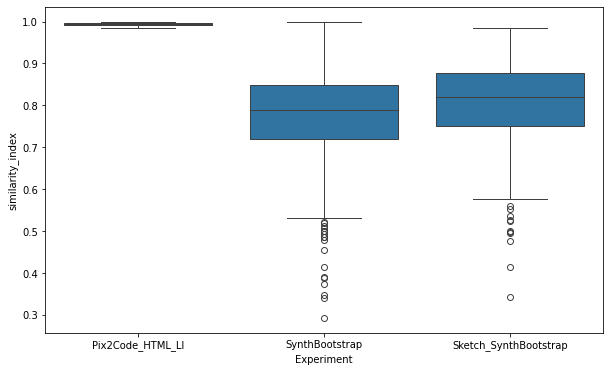

In [35]:
for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='experiment', y=metric, data=combined_df)
    #plt.title(f'Distribution of {metric} Across Experiments')
    plt.ylabel(metric)
    plt.xlabel('Experiment')
    plt.show()


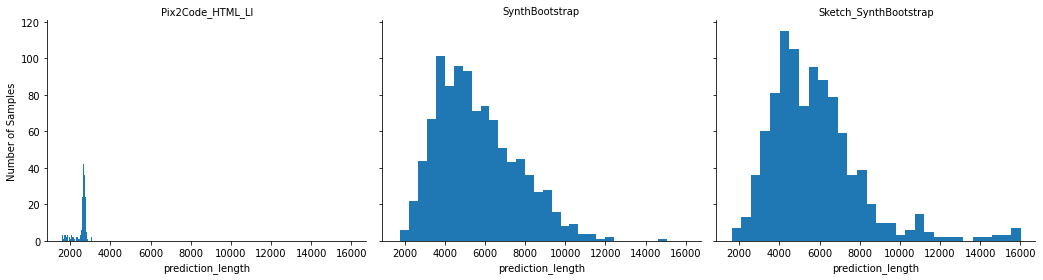

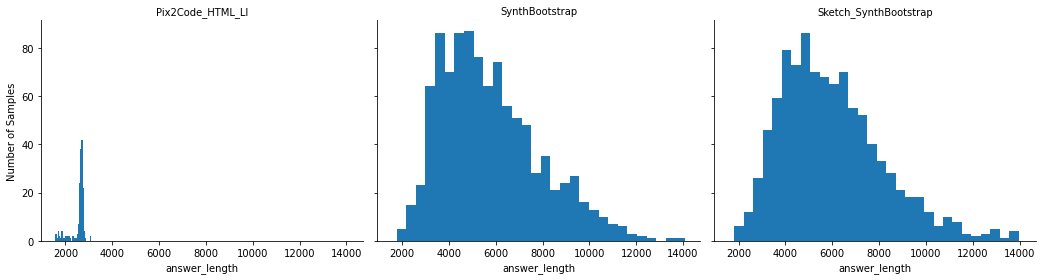

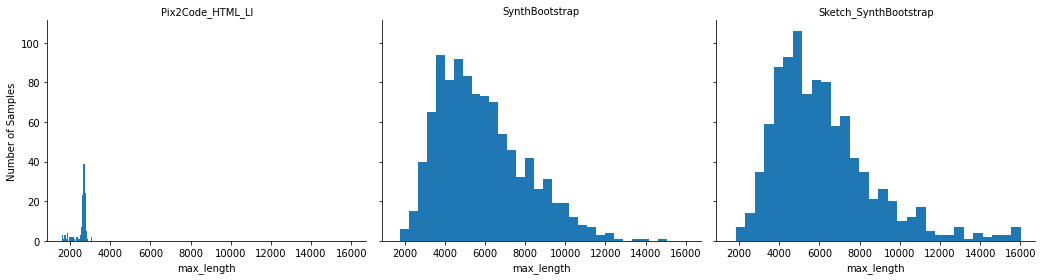

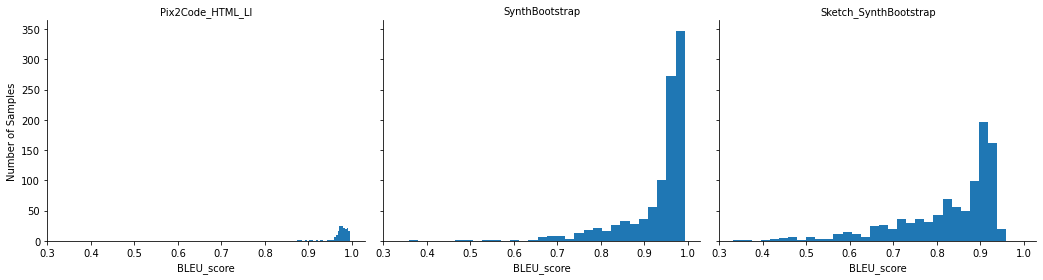

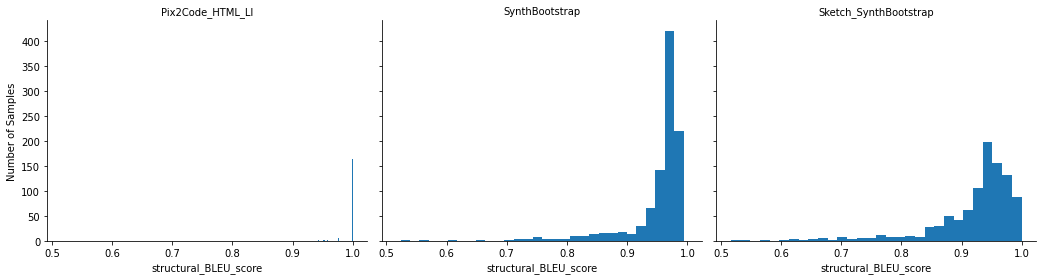

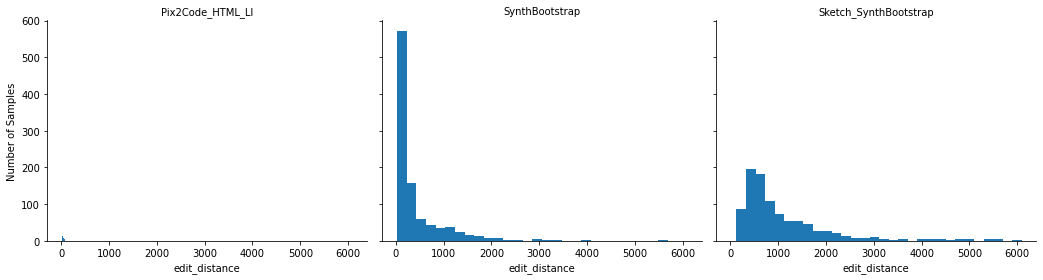

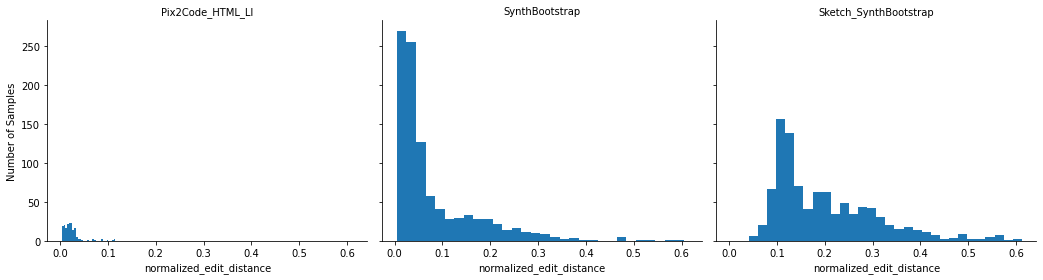

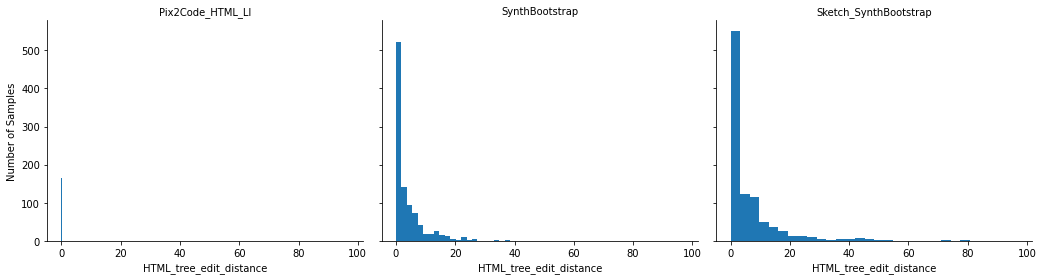

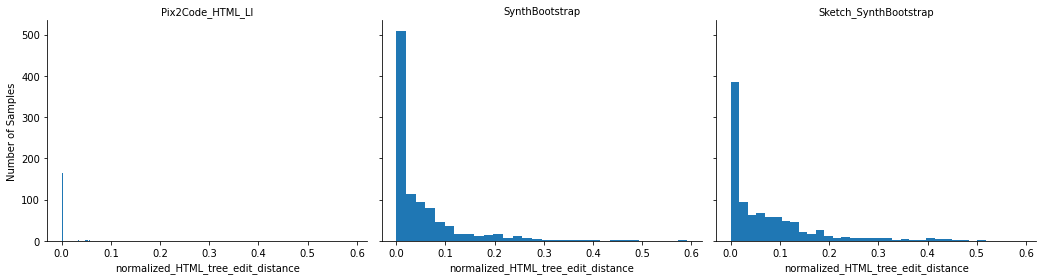

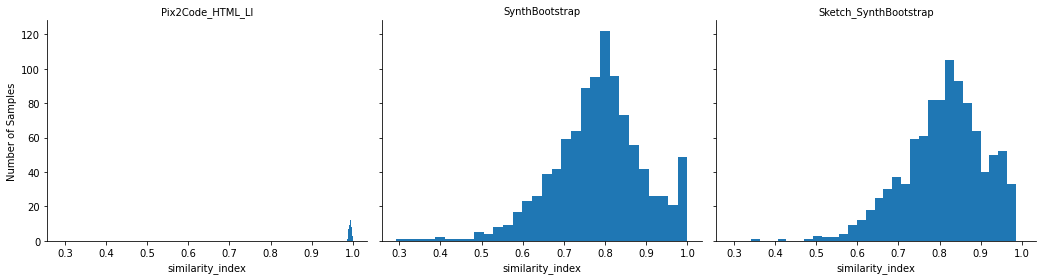

In [43]:
for metric in metrics:
    g = sns.FacetGrid(combined_df, col="experiment", height=4, aspect=1.2)
    g.map(plt.hist, metric, bins=30)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(metric, "Number of Samples")
    #plt.suptitle(f'Distribution of {metric} by Experiment', y=1.05)
    plt.show()

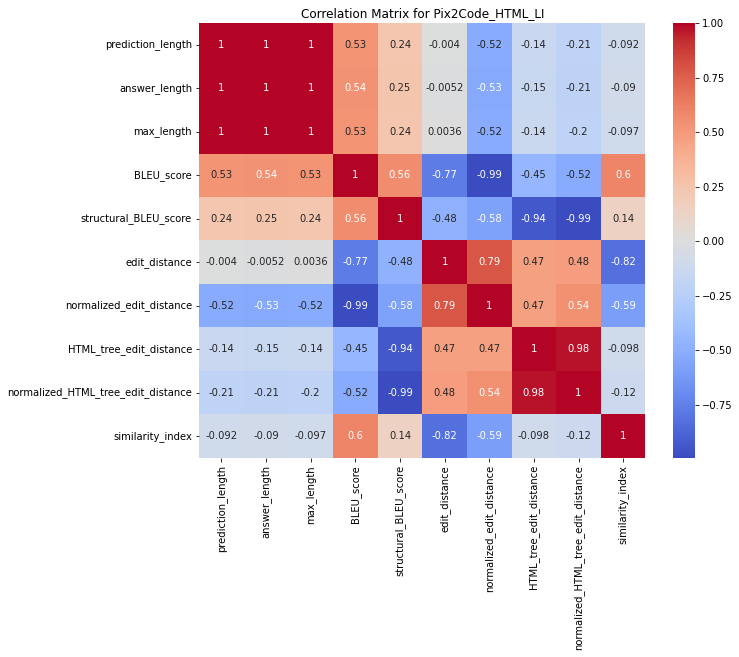

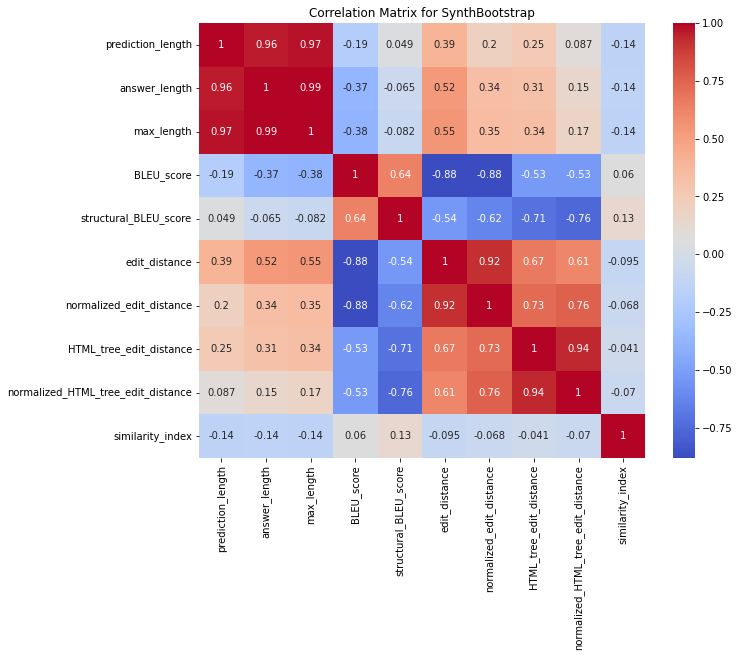

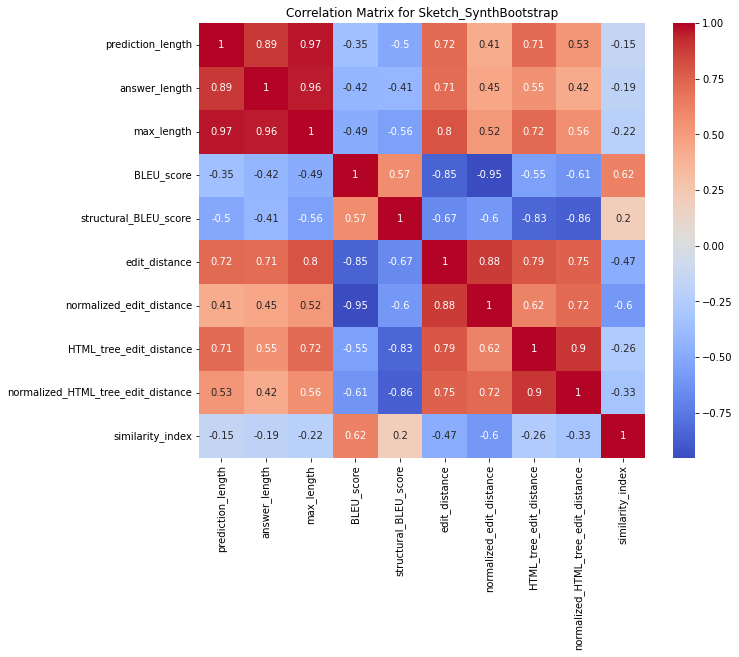

In [37]:
for exp in combined_df['experiment'].unique():
    subset = combined_df[combined_df['experiment'] == exp]
    correlation_matrix = subset[metrics].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {exp}')
    plt.show()


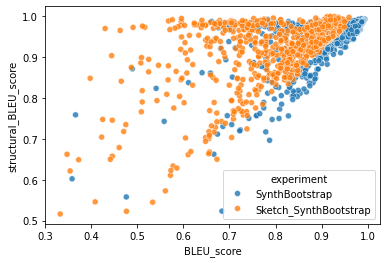

In [64]:
sns.scatterplot(x='BLEU_score', y='structural_BLEU_score', hue='experiment', alpha=0.8, data=combined_df)
plt.show()